# Calculo de SMA, EMA y WMA

### Primero obtenemos la información a través de la biblioteca yfinance y la API de yahoo finance

In [13]:
from pandas_datareader import data
import pandas as pd
import yfinance as yf
import ta_py as ta


yf.pdr_override() 

symbol = 'BIMBOA.MX'
data_source='google'
start_date = '2018-01-01'
end_date = '2023-03-17'
df = data.get_data_yahoo(symbol, start_date, end_date)

df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,43.720001,43.750000,42.910000,43.380001,39.843021,1626731
2018-01-03,43.220001,43.650002,43.099998,43.400002,39.861397,1230572
2018-01-04,43.650002,44.000000,43.029999,43.669998,40.109379,2341379
2018-01-05,43.770000,44.000000,43.419998,43.540001,39.989979,3034896
2018-01-08,43.639999,43.970001,43.110001,43.509998,39.962418,1886857
...,...,...,...,...,...,...
2023-03-10,86.309998,86.449997,83.110001,83.529999,82.853432,2104156
2023-03-13,84.339996,87.940002,82.589996,85.360001,84.668610,2242610
2023-03-14,85.360001,86.889999,84.900002,85.120003,84.430557,2212066


## Obtenemos la media móvil a 6 días del precio de cierre 
### el parámetro rolling indica el periodo a considerar

In [2]:
df['MA10'] = df['Close'].rolling(6).mean()
df

,Open,High,Low,Close,Adj Close,Volume,MA10
Date,,,,,,,
2018-01-02,43.720001,43.750000,42.910000,43.380001,39.843025,1626731,NaN
2018-01-03,43.220001,43.650002,43.099998,43.400002,39.861393,1230572,NaN
2018-01-04,43.650002,44.000000,43.029999,43.669998,40.109379,2341379,NaN
2018-01-05,43.770000,44.000000,43.419998,43.540001,39.989979,3034896,NaN
2018-01-08,43.639999,43.970001,43.110001,43.509998,39.962425,1886857,NaN
...,...,...,...,...,...,...,...
2023-03-10,86.309998,86.449997,83.110001,83.529999,82.853432,2104156,86.431666
2023-03-13,84.339996,87.940002,82.589996,85.360001,84.668610,2242610,85.913333
2023-03-14,85.360001,86.889999,84.900002,85.120003,84.430557,2212066,85.451667


## Calculemos la SMA y el EMA a 50 días

In [3]:
df['MA50']  = df['Close'].rolling(50).mean()
df['EMA50'] = df['Close'].ewm(span=50, adjust=False).mean()
df

,Open,High,Low,Close,Adj Close,Volume,MA10,MA50,EMA50
Date,,,,,,,,,
2018-01-02,43.720001,43.750000,42.910000,43.380001,39.843025,1626731,NaN,NaN,43.380001
2018-01-03,43.220001,43.650002,43.099998,43.400002,39.861393,1230572,NaN,NaN,43.380785
2018-01-04,43.650002,44.000000,43.029999,43.669998,40.109379,2341379,NaN,NaN,43.392127
2018-01-05,43.770000,44.000000,43.419998,43.540001,39.989979,3034896,NaN,NaN,43.397926
2018-01-08,43.639999,43.970001,43.110001,43.509998,39.962425,1886857,NaN,NaN,43.402321
...,...,...,...,...,...,...,...,...,...
2023-03-10,86.309998,86.449997,83.110001,83.529999,82.853432,2104156,86.431666,89.7362,88.084714
2023-03-13,84.339996,87.940002,82.589996,85.360001,84.668610,2242610,85.913333,89.7974,87.977863
2023-03-14,85.360001,86.889999,84.900002,85.120003,84.430557,2212066,85.451667,89.8068,87.865790


<AxesSubplot:xlabel='Date'>

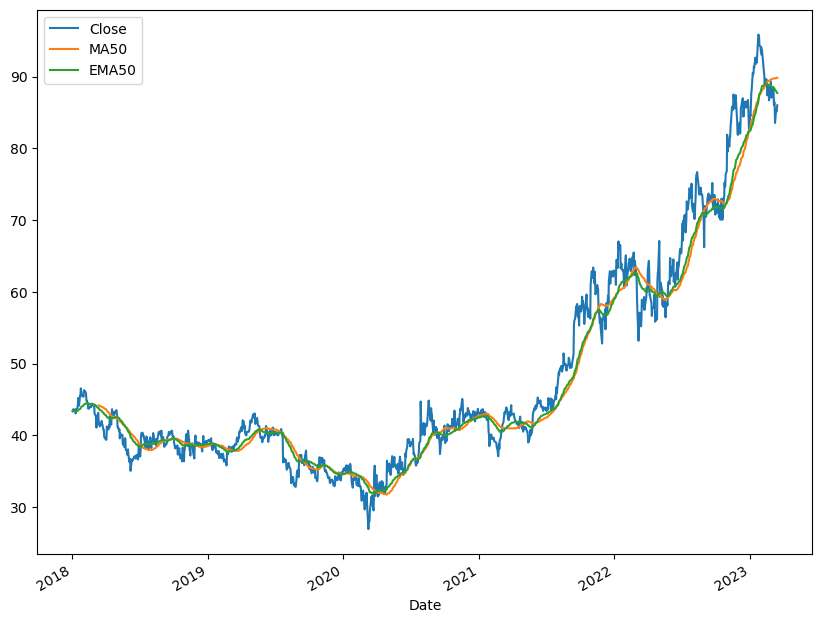

In [4]:
df['MA50']  = df['Close'].rolling(50).mean()
df['EMA50'] = df['Close'].ewm(span=50, adjust=False).mean()
df[['Close', 'MA50', 'EMA50']].plot(figsize=(10,8))



### Calculo de WMA

In [5]:
import numpy as np
weights = np.arange(1,11) 
weights

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [6]:
wma10 = df['Close'].rolling(10).apply(lambda prices: np.dot(prices, weights)/weights.sum(), raw=True)

df['WMA10'] = np.round(wma10, decimals=3)
#df[['Close','WMA10']].head(20)

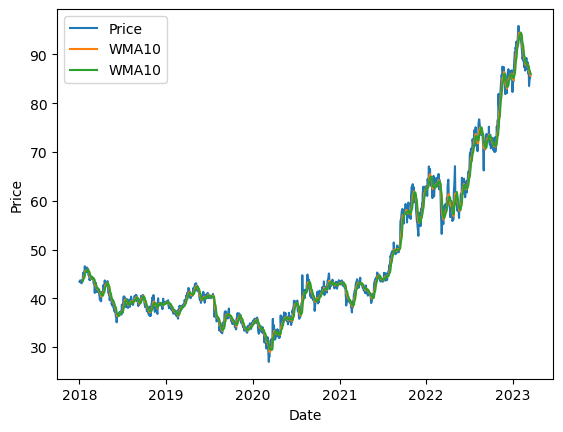

In [7]:
import matplotlib.pyplot as plt


sma10 = df['Close'].rolling(10).mean()
#plt.figure(figsize = (12,6))
plt.plot(df['Close'], label="Price")
plt.plot(wma10, label="WMA10")
plt.plot(sma10, label="WMA10")

plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

<AxesSubplot:xlabel='Date'>

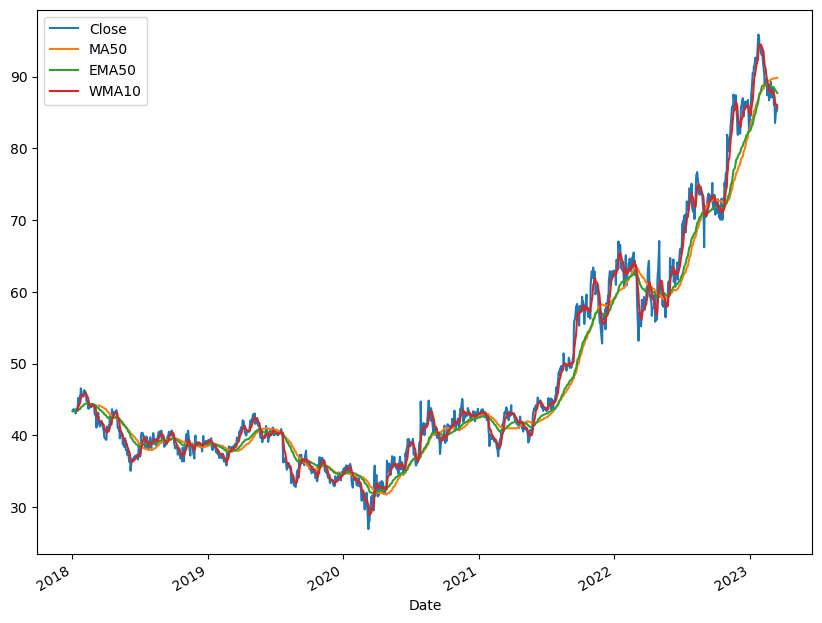

In [8]:
df[['Close', 'MA50', 'EMA50','WMA10']].plot(figsize=(10,8))



<AxesSubplot:xlabel='Date'>

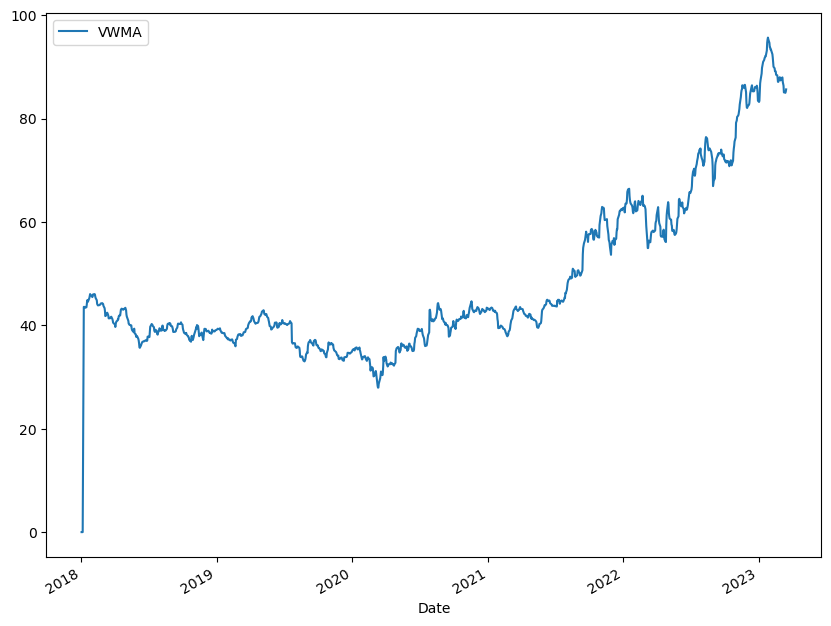

In [25]:

#asd = pd.concat([df['Close'],df['Volume']], join = 'inner', axis = 1)

a = []
#print(asd['close'].get(i))
for i in range(len(asd)-1):
    a.append( [df['Close'].get(i+1),df['Volume'].get(i+1)])
    
length = 4
vwma = [0]*4 +ta.vwwma(a,length)

df['VWMA'] = vwma
df[['VWMA']].plot(figsize=(10,8))